# Exploratory Data Analysis (EDA)

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import spacy

nlp = spacy.load('en_core_web_md')

## Load Datasets

In [76]:
scripts_df = pd.read_csv('Data/Processed/scripts.csv')
episods_df = pd.read_csv('Data/Processed/episodes.csv')

scripts_df.head(3)

e:\installation root\python 3.8.7\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,episode_id,character,location,raw_text,word_count,normalized_text
0,32,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",31,actually little disease magazine news show nat...
1,32,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,3,mr bergstrom
2,32,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,22,know sure like talk touch lesson plan teach


## Ten Most Active Characters

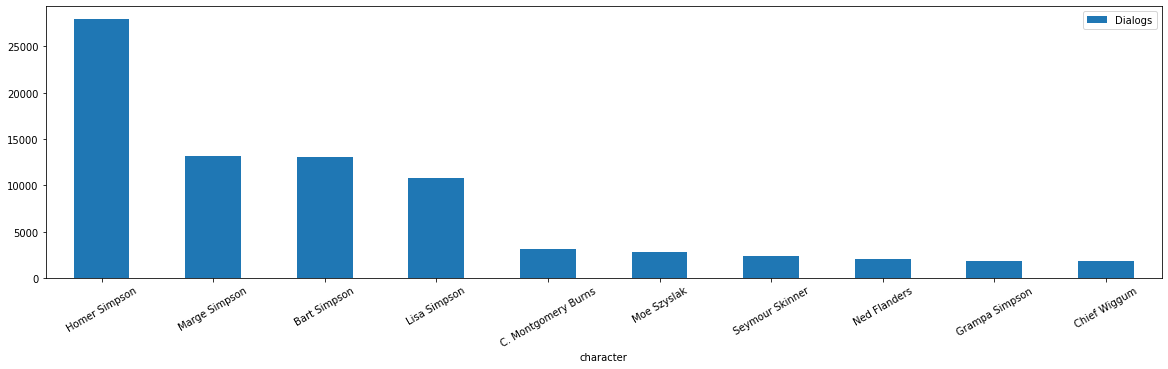

In [127]:
top_ten_active_characters = scripts_df.groupby(
    by = 'character',
    as_index = False
).count().sort_values(
    by = 'raw_text',
    ascending = False
).iloc[:10]

plot = top_ten_active_characters[['character', 'raw_text']].plot.bar(x = 'character', y = 'raw_text', label = 'Dialogs', rot = 30)
fig = plot.get_figure()
fig.set_size_inches(20, 5)
fig.savefig("Plots/top_ten_active_characters.png")
plt.show()

## Twenty Top Common Words

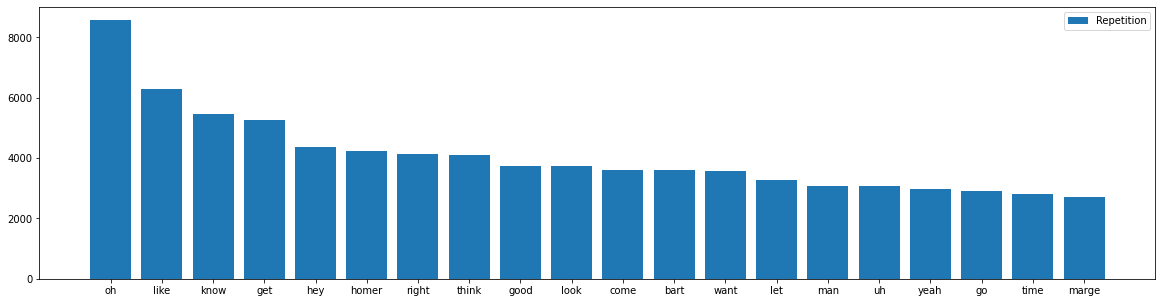

In [130]:
normalized_text_values = scripts_df.loc[scripts_df['normalized_text'].notnull(), 'normalized_text'].values
twenty_top_common_words = pd.Index(' '.join(normalized_text_values).split(' ')).value_counts()[:20]

fig = plt.figure(figsize = (20, 5))
plt.bar(x = twenty_top_common_words.index, height = twenty_top_common_words.values, label = 'Repetition')
plt.legend()
plt.savefig('Plots/twenty_top_common_words.png')
plt.show()